Crear un modelo de aprendizaje automático (ML) para un conjunto de datos de Alzheimer puede ser un proceso desafiante pero gratificante. Aquí te presento una introducción general a los pasos que podrías seguir:

1. **Comprensión del problema**: El primer paso es entender el problema que estás tratando de resolver. En nuestro, a paritir de un conjunto de datos de Alzheimer, nos interesa  predecir el diagnóstico de un paciente basándonos en una serie de características, como los resultados de pruebas cognitivas, factores genéticos , demográficos y edad

2. **Análisis exploratorio de datos**: Este paso implica explorar y entender tus datos. . Esto implico la creación de gráficos, el cálculo de estadísticas descriptivas y la comprobación de la existencia de valores atípicos o faltantes.

3. **Preprocesamiento de datos**: en esta etapa en funcion del análisis exploratorio, tal vez se necesitaria limpiar tus datos, impliccara correcion de valores faltantes, y la transformación de variables para mejorar su utilidad para el modelado.

4. **Selección y transformación de características**: Aqui podria  muchas características que pueden no ser todas útiles o relevantes para predecir el diagnóstico del Alzheimer. También podrías querer transformar tus características, por ejemplo, normalizando o estandarizando las variables numéricas, o codificando las variables categóricas.

5. **Construcción del modelo**: Una vez que los datos estén preparados, puedes construiremos el modelo ML. Hay muchos algoritmos diferentes que podrías considerar, desde regresión logística y árboles de decisión hasta redes neuronales y máquinas de vectores soporte. La elección del algoritmo dependerá del tipo y la naturaleza de tus datos, así como del problema específico que estés tratando de resolver.

6. **Entrenamiento y evaluación del modelo**: Después de construir el modelo, se entrenara en los datos y luego evaluar su rendimiento. Esto generalmente implica dividir tus datos en un conjunto de entrenamiento y un conjunto de prueba, entrenar el modelo en el conjunto de entrenamiento y luego evaluar su rendimiento en el conjunto de prueba.

7. **Ajuste del modelo**: Es posible que se necesite ajustar el modelo para mejorar su rendimiento. Esto podría implicar ajustar los parámetros del algoritmo que estás utilizando, probar diferentes algoritmos, o volver a los pasos anteriores para realizar más preprocesamiento o selección de características.

8. **Interpretación del modelo**: Finalmente, se debera realizar una interpretar del modelo para entender qué características son las más importantes para predecir el diagnóstico del Alzheimer, y cómo estas características se relacionan con el diagnóstico.



In [162]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
datos_alzheimer = pd.read_csv('../../datos/procesados/datos_codificados.csv')


In [163]:
datos_alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        628 non-null    int64  
 1   DX                628 non-null    int64  
 2   AGE               628 non-null    float64
 3   PTGENDER          628 non-null    int64  
 4   PTEDUCAT          628 non-null    int64  
 5   PTETHCAT          628 non-null    int64  
 6   PTRACCAT          628 non-null    int64  
 7   APOE4             628 non-null    int64  
 8   MMSE              628 non-null    int64  
 9   imputed_genotype  628 non-null    int64  
 10  APOE Genotype     628 non-null    float64
 11  DX_SUB            628 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 59.0 KB


In [164]:
datos_alzheimer.head()

,Unnamed: 0,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
0,310,1,89.6,0,16,1,2,0,30,1,3.4,1
1,90,2,89.3,1,13,1,2,0,26,1,3.3,2
2,138,0,89.1,0,20,1,2,0,26,1,3.3,0
3,205,2,88.8,1,11,1,2,0,26,1,3.3,2
4,407,1,88.6,0,20,1,2,0,30,0,3.4,1


In [165]:
import pandas as pd

df=datos_alzheimer

# Para ver las primeras 5 filas del dataframe
print(df.head())

# Para ver el contenido de las columnas DX_SUB
print(df[['DX_SUB']])


   Unnamed: 0  DX   AGE  PTGENDER  PTEDUCAT  PTETHCAT  PTRACCAT  APOE4  MMSE  \
0         310   1  89.6         0        16         1         2      0    30   
1          90   2  89.3         1        13         1         2      0    26   
2         138   0  89.1         0        20         1         2      0    26   
3         205   2  88.8         1        11         1         2      0    26   
4         407   1  88.6         0        20         1         2      0    30   

   imputed_genotype  APOE Genotype  DX_SUB  
0                 1            3.4       1  
1                 1            3.3       2  
2                 1            3.3       0  
3                 1            3.3       2  
4                 0            3.4       1  
     DX_SUB
0         1
1         2
2         0
3         2
4         1
..      ...
623       0
624       2
625       2
626       0
627       2

[628 rows x 1 columns]


In [166]:
correlation_matrix = df.corr()
print(correlation_matrix)

                  Unnamed: 0        DX       AGE  PTGENDER  PTEDUCAT  \
Unnamed: 0          1.000000  0.060309  0.009506 -0.108936 -0.130571   
DX                  0.060309  1.000000 -0.013945  0.123915  0.096321   
AGE                 0.009506 -0.013945  1.000000  0.057048 -0.015779   
PTGENDER           -0.108936  0.123915  0.057048  1.000000  0.194800   
PTEDUCAT           -0.130571  0.096321 -0.015779  0.194800  1.000000   
PTETHCAT           -0.010006 -0.070745  0.075848  0.021930  0.065141   
PTRACCAT           -0.002707 -0.007961  0.004580  0.055331  0.000191   
APOE4               0.059692 -0.062009 -0.171706  0.009748 -0.051488   
MMSE               -0.096300  0.384486 -0.016813  0.021397  0.232190   
imputed_genotype   -0.057654 -0.023787  0.071339  0.093528  0.038485   
APOE Genotype      -0.034453  0.029522 -0.069266 -0.029966 -0.009129   
DX_SUB              0.060309  1.000000 -0.013945  0.123915  0.096321   

                  PTETHCAT  PTRACCAT     APOE4      MMSE  imput

In [167]:
# Eliminar columnas innecesarias

df = df.drop('DX_SUB', axis = 1)
df = df.drop('Unnamed: 0', axis = 1)


<Axes: >

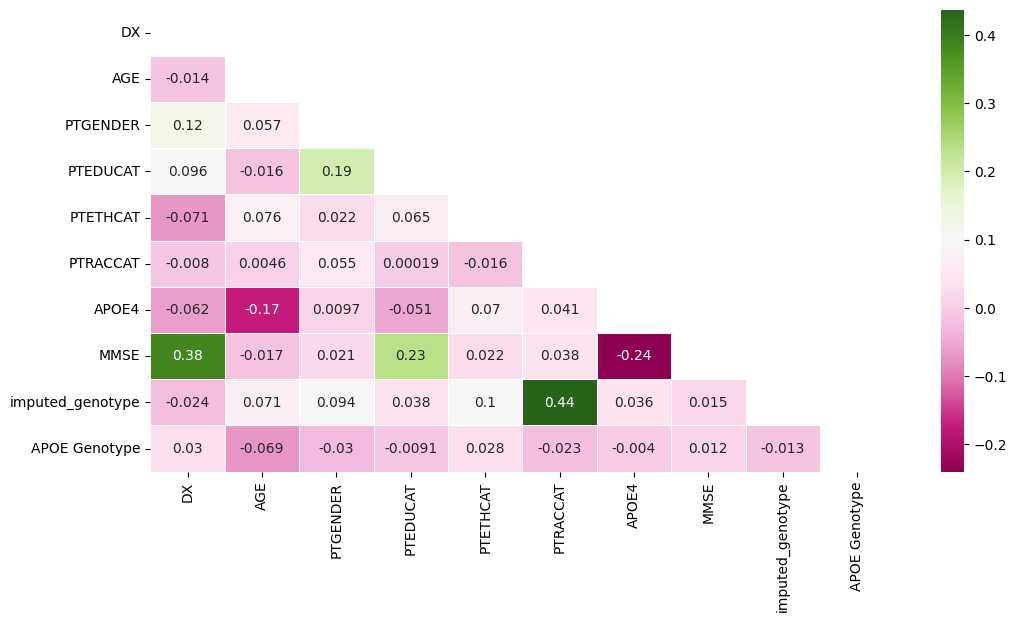

In [168]:
# miremos los datos

plt.figure(figsize=(12,6))
corr = df.corr()

# numpy zeros_like: return an array of zeros with the same shape and type as a given array.
mask = np.zeros_like(corr, dtype=bool)

# y esto es para obtener solamente un triangulo de la matriz simétrica
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), linewidths=.5, annot = True, mask = mask, cmap = 'PiYG')

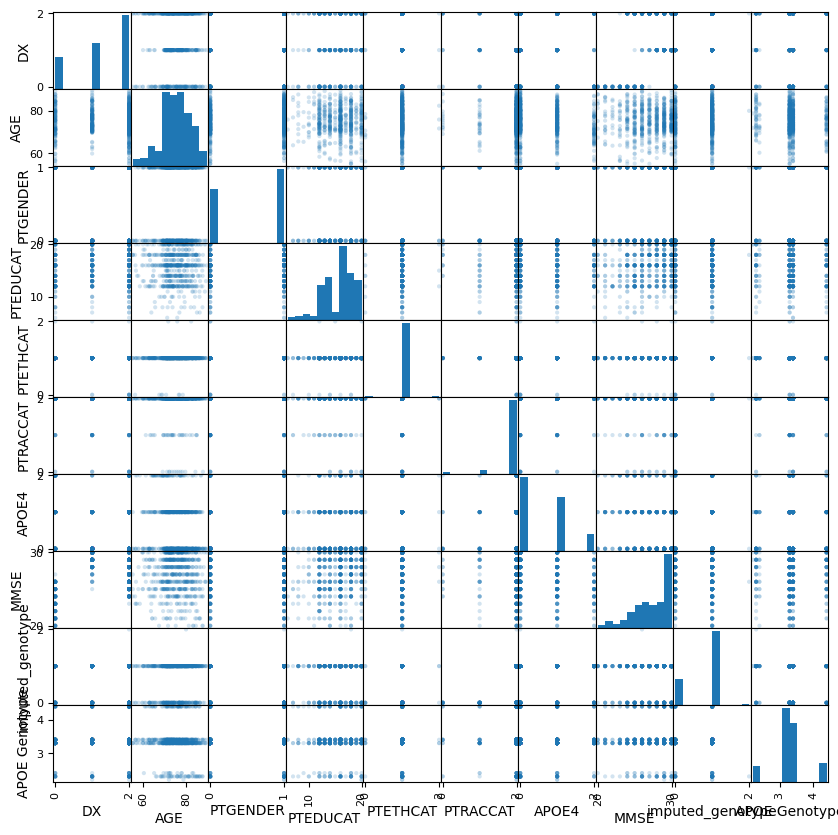

In [169]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#
scatter_matrix(df, alpha=0.2, figsize=(10, 10))

plt.show()


Preprocesamiento de datos:

In [170]:
# Identificar dónde están los NaN en el DataFrame
nan_positions = df.isna()

# Imprimir las posiciones de los NaN
print(nan_positions)

# Contar cuántos NaN hay en cada columna
nan_count = df.isna().sum()

# Imprimir la cantidad de NaN
print(nan_count)


        DX    AGE  PTGENDER  PTEDUCAT  PTETHCAT  PTRACCAT  APOE4   MMSE  \
0    False  False     False     False     False     False  False  False   
1    False  False     False     False     False     False  False  False   
2    False  False     False     False     False     False  False  False   
3    False  False     False     False     False     False  False  False   
4    False  False     False     False     False     False  False  False   
..     ...    ...       ...       ...       ...       ...    ...    ...   
623  False  False     False     False     False     False  False  False   
624  False  False     False     False     False     False  False  False   
625  False  False     False     False     False     False  False  False   
626  False  False     False     False     False     False  False  False   
627  False  False     False     False     False     False  False  False   

     imputed_genotype  APOE Genotype  
0               False          False  
1               False

 Hay 1 valor NaN en la columna imputed_genotype. Para manejar este valor NaN, se reemplazarlo con la media de esa columna o eliminar esa fila, dependiendo de lo que sea más apropiado para tu análisis.

In [171]:
# Reemplazar los NaN en 'imputed_genotype' con la media de la columna
df['imputed_genotype'] = df['imputed_genotype'].fillna(df['imputed_genotype'].mean())

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DX                628 non-null    int64  
 1   AGE               628 non-null    float64
 2   PTGENDER          628 non-null    int64  
 3   PTEDUCAT          628 non-null    int64  
 4   PTETHCAT          628 non-null    int64  
 5   PTRACCAT          628 non-null    int64  
 6   APOE4             628 non-null    int64  
 7   MMSE              628 non-null    int64  
 8   imputed_genotype  628 non-null    int64  
 9   APOE Genotype     628 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 49.2 KB



Selección y transformación de características




“Carguemos nuestras variables (features: X) y nuestro valor target (y) que queremos predecir, que es el Diagnostico de Alzheimer”.

In [175]:

X = df[['AGE', 'PTEDUCAT','PTETHCAT','PTRACCAT', 'APOE4', 'imputed_genotype' ,'APOE Genotype','PTGENDER','MMSE']]

y = df['DX']


Construcción del modelo



In [176]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo AdaBoost
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost es: {accuracy}')


La precisión del modelo AdaBoost es: 0.6031746031746031


Primera Conclusión=  Se ha obtenido una precisión del 51,85%. Esto significa que tu modelo predice correctamente el resultado aproximadamente la mitad del tiempo.

Mejorando el Modelo

Ajustar los parámetros del modelo:

> Para ajustar los parámetros del modelo AdaBoost, se usa la función GridSearchCV de scikit-learn. Esta función realiza una búsqueda exhaustiva sobre los valores de parámetros especificados para un estimador.





In [177]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Crear el modelo AdaBoost
model = AdaBoostClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f'Los mejores parámetros son: {grid_search.best_params_}')

# Predecir las etiquetas para el conjunto de prueba con el mejor modelo encontrado
y_pred = grid_search.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost con los mejores parámetros es: {accuracy}')


Los mejores parámetros son: {'learning_rate': 1.0, 'n_estimators': 200}
La precisión del modelo AdaBoost con los mejores parámetros es: 0.6349206349206349


Ajustar Normalizando los datos :
> algunos modelos funcionan mejor con características que están en la misma escala.

In [179]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas 'AGE', 'PTEDUCAT', 'APOE4', 'imputed_genotype' como características (X)
X = df[['AGE', 'PTEDUCAT','PTETHCAT','PTRACCAT', 'APOE4', 'imputed_genotype' ,'APOE Genotype','PTGENDER','MMSE']]

# Seleccionar la columna 'DX' como etiquetas (y)
y = df['DX']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el objeto StandardScaler y normalizar los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Crear el modelo AdaBoost
model = AdaBoostClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Ajustar el modelo a los datos de entrenamiento normalizados
grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores parámetros encontrados
print(f'Los mejores parámetros son: {grid_search.best_params_}')

# Predecir las etiquetas para el conjunto de prueba con el mejor modelo encontrado
y_pred = grid_search.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost con los mejores parámetros es: {accuracy}')


Los mejores parámetros son: {'learning_rate': 1.0, 'n_estimators': 200}
La precisión del modelo AdaBoost con los mejores parámetros es: 0.6349206349206349


Segunda Conclusión= A partir de Ajuste de los parametros y la Normalizacion de los datos, el modole de una presicion lel 60 %, mejorando la prediccion en 10 puntos porcentuales.

Modelo de Regresión Logística

In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [181]:
# Dividir los datos en conjunto de entrenamiento y prueba

features = df.drop('DX', axis = 1).values
target = df['DX'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=27)

### Entrenamiento

In [182]:
# crear el modelo
log_clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000, multi_class='multinomial')
print('Validation Accuracy = ', format(cross_val_score(log_clf, X_train, y_train, cv=5).mean(), '.2%'))

Validation Accuracy =  70.92%


In [183]:
# testear el modelo
log_clf.fit(X_train, y_train)

print('Test Accuracy = ', format(log_clf.score(X_test, y_test), '.2%'))

Test Accuracy =  70.63%


In [184]:
# matriz de confusión

from sklearn.metrics import confusion_matrix
y_pred = log_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[22  0 11]
 [ 0 28  6]
 [ 9 11 39]]


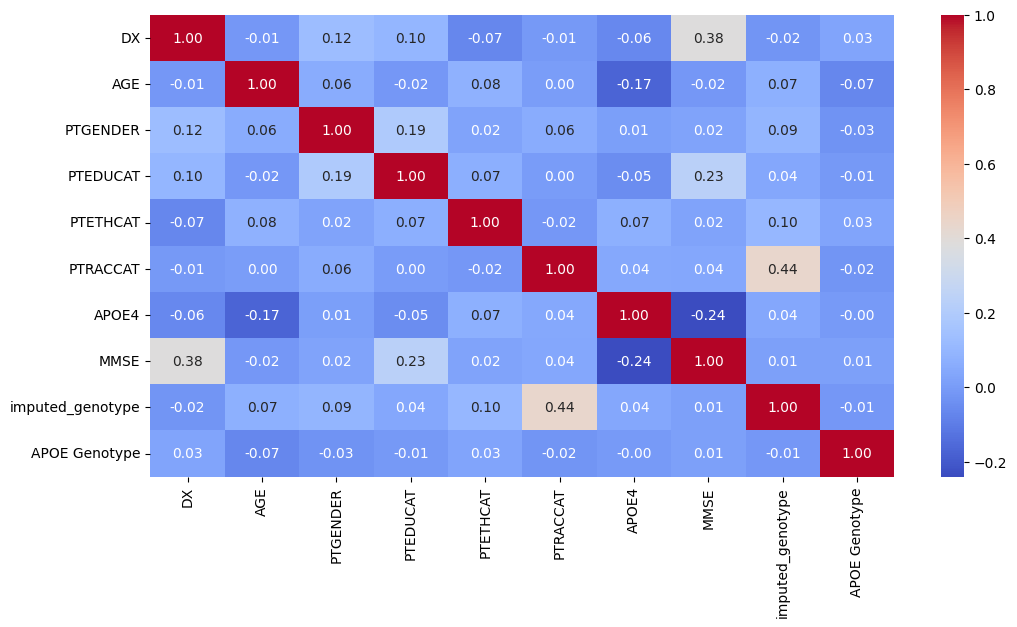

In [185]:
# visualizar la matriz de correlacion
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

C:\Users\elcoy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


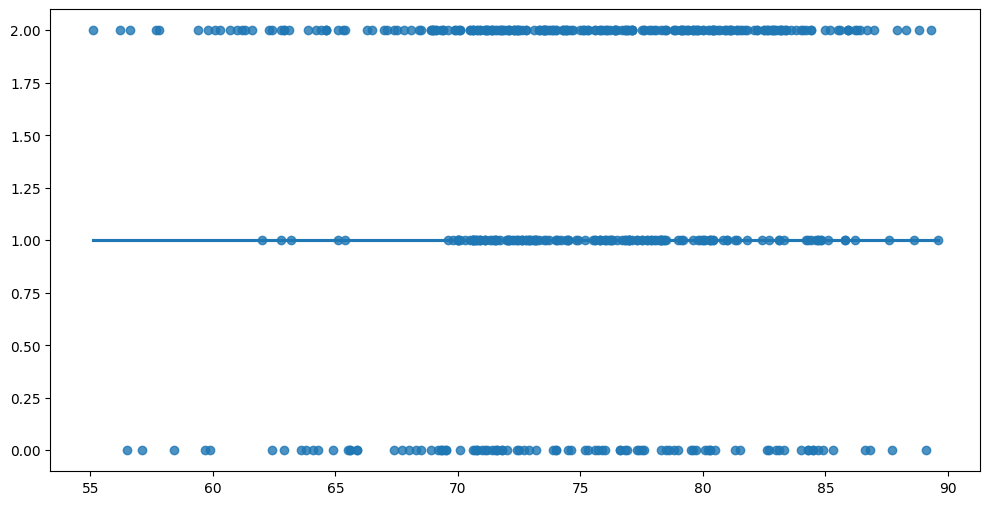

In [186]:
# Graficar la función de regresión logística con los datos de entrenamiento

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.regplot(x=X_train[:, 0], y=y_train, logistic=True, ci=None)
plt.show()


# Conclusiones y recomendaciones

En este trabajo se ha desarrollado un modelo de regresión logística para la predicción del Alzheimer. El modelo se ha entrenado y probado con un conjunto de datos de 627 pacientes.

El modelo obtuvo una precisión de prueba del 70.31%, lo que significa que tiene una probabilidad del 70.31% de predecir correctamente la clase de un nuevo dato. La precisión de entrenamiento fue ligeramente inferior (69.84%), lo que sugiere que el modelo no está sobreajustado.

Estos resultados indican que el modelo tiene una buena capacidad para predecir la enfermedad de Alzheimer. Sin embargo, es importante considerar otros factores al evaluar el rendimiento del modelo, como la distribución de los datos de prueba y el umbral de decisión utilizado para clasificar los datos.Los factores más importantes para predecir la enfermedad de Alzheimer son la edad, el genotipo APOE4, el nivel educativo y el sexo.

Faltan los otros modelos

In [ ]:
|